In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statlearning import plot_regressions
from statlearning import plot_histogram
from statlearning import plot_feature_importance

In [2]:
data = pd.read_csv("NBA_Train.csv")
data

,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,2.489530,PF,Houston Rockets,22,76,2078,19.1,0.577,9.2,...,7.0,1.3,3.5,8.2,18.3,119,105,4.6,2.7,7.3
1,2,2.433333,PG,Utah Jazz,24,73,1490,13.2,0.510,1.6,...,28.8,1.7,0.1,14.3,19.0,105,109,1.2,1.2,2.3
2,3,20.158622,SF,Oklahoma City Thunder,25,81,3122,29.8,0.635,2.2,...,26.7,1.7,1.5,12.2,33.0,123,104,14.8,4.4,19.2
3,4,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,...,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3
4,5,1.500000,PG,Brooklyn Nets,21,48,489,8.3,0.446,2.6,...,20.4,2.7,0.2,20.9,17.4,90,110,-0.4,0.3,-0.1
5,6,2.854940,PF,Miami Heat,33,46,653,10.5,0.523,8.4,...,2.9,0.9,2.0,12.7,13.9,104,105,0.3,0.8,1.1
6,7,1.252440,SF,Detroit Pistons,22,43,395,6.7,0.460,3.2,...,4.3,1.1,0.2,9.4,15.4,93,108,-0.2,0.3,0.2
7,8,6.300000,PG,Brooklyn Nets,30,80,2252,11.5,0.498,1.1,...,22.7,1.3,0.8,14.8,17.8,102,110,0.9,1.4,2.3
8,9,15.514031,SG,New Orleans Pelicans,25,64,2057,14.9,0.540,1.7,...,16.6,1.9,0.5,12.8,23.2,105,113,2.0,0.5,2.5
9,10,12.000000,PG,Toronto Raptors,27,79,2862,20.1,0.567,3.6,...,34.7,2.2,0.4,13.4,22.9,118,106,8.4,3.3,11.7


In [3]:
data.isnull().sum()

Train_ID    0
SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

In [4]:
data.drop(columns="Train_ID", inplace=True)

In [5]:
#%% outliers
feature = data.iloc[:,1:]
target = data.iloc[:,0]

In [6]:
def scatter_plot(data, feature, target):
    
    plt.scatter(data[feature], data[target])
    plt.xlabel(feature)
    plt.ylabel(target)

    items = [feature, " vs ", target]
    title = ''.join(items)
    plt.title(title)


def subplot_scatter(data, target):
    plt.figure(figsize=(30, 90))
    num_subplot = len(data.columns.drop(target))
    for i, col in enumerate(data.columns.drop(target)):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        _scatter(data, col, target)
    return data

In [7]:
categorical_feature = ["POSITION", "TEAM"]
without_categorical_feature = data.columns.drop(["TEAM", "POSITION","SALARY"])

In [8]:
#%%
import seaborn as sns

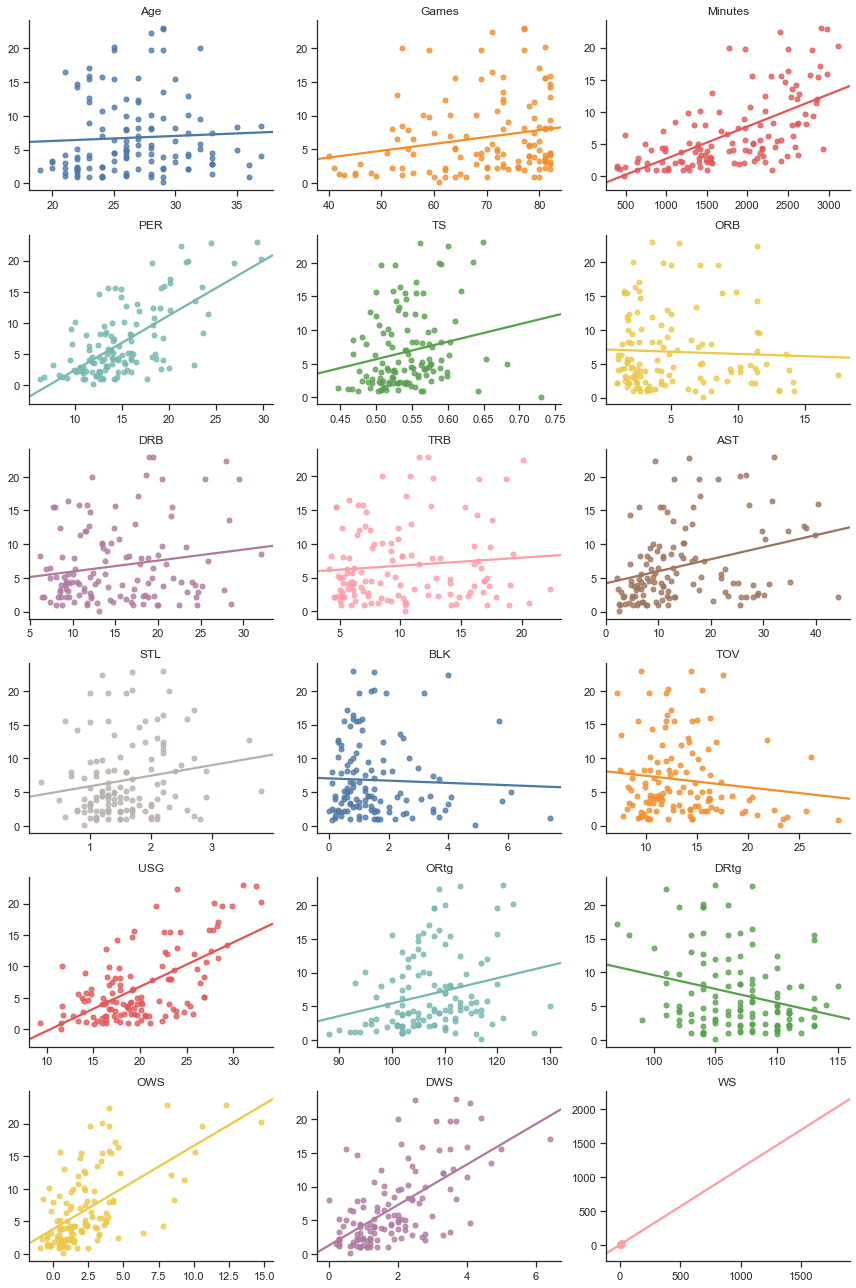

In [9]:
#%% Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)


with sns.color_palette(crayon):
    plot_regressions(data[without_categorical_feature], data["SALARY"])
    plt.show()


In [10]:
#%% normalization
normalized  = lambda x: (x - x.min()) * (1-0) / (x.max()-x.min())

normalized_data= normalized(data[without_categorical_feature])

In [11]:
#%% EDA
from scipy import stats
from scipy.stats import norm, skew

In [12]:
#%%
def stats(x):
    return pd.DataFrame([x.mean(), x.std(), x.min(), x.max(), x.median(), x.skew(), x.kurt(), ],
                        index=['mean', 'std', 'min', 'max', 'median','skew', 'kurt', ]).round(4)


def plot_distribution(series):
    
    sns.distplot(series, fit=norm, bins=10, color='cornflowerblue')
    (mu, sigma) = norm.fit(series)
    plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(
        mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+series.name)

def subplot_distribution(data):
    
    plt.figure(figsize=(30, 90))
    num_subplot = len(data.columns)
    for i, col in enumerate(data.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        
        plot_distribution(data[col])

In [13]:
normalized_data= normalized(data[without_categorical_feature])

stats(normalized_data)

,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
mean,0.4268,0.7014,0.5189,0.3687,0.3399,0.2518,0.3443,0.3317,0.2928,0.3854,0.2057,0.2910,0.4510,0.4567,0.5481,0.2062,0.2875,0.2219
std,0.2267,0.2722,0.2578,0.1832,0.1611,0.2318,0.2324,0.2542,0.2327,0.1716,0.1837,0.1924,0.2094,0.1807,0.2044,0.1681,0.1842,0.1763
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
median,0.3889,0.7738,0.5372,0.3277,0.3310,0.1636,0.2934,0.2802,0.2168,0.3611,0.1486,0.2454,0.4135,0.4524,0.5556,0.1624,0.2500,0.1684
skew,0.4454,-0.8096,-0.1653,0.9770,0.8907,1.0456,0.6395,0.6544,1.0429,0.8004,1.8035,1.2128,0.4266,0.1807,-0.1464,2.1304,0.9860,1.7154
kurt,-0.3677,-0.3490,-0.9378,1.3741,1.9692,0.1246,-0.3928,-0.7271,0.2968,1.0451,3.7164,1.6847,-0.3485,0.2327,-0.4433,5.7638,1.0245,3.7563


In [14]:
#%%
high_skewness = ["BLK", "OWS", "WS"]
for column in high_skewness:
    normalized_data[column] = normalized_data[column] ** (1/4)

medium_skewness = ["PER", "TS", "ORB",
                    "DRB", "TRB", "AST", "STL", "TOV", "DWS"]
for column in medium_skewness:
    normalized_data[column] = np.sqrt(normalized_data[column])

low_skewness = ["Games"]
for column in low_skewness:
    normalized_data[column] =normalized_data[column] ** 2

In [15]:
stats(normalized_data)

,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
mean,0.4268,0.5655,0.5189,0.5871,0.5650,0.4460,0.5485,0.5280,0.4964,0.6041,0.6261,0.5095,0.4510,0.4567,0.5481,0.6360,0.5073,0.6462
std,0.2267,0.3310,0.2578,0.1557,0.1444,0.2308,0.2093,0.2309,0.2163,0.1433,0.1499,0.1781,0.2094,0.1807,0.2044,0.1354,0.1740,0.1414
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
median,0.3889,0.5989,0.5372,0.5724,0.5753,0.4045,0.5417,0.5294,0.4656,0.6009,0.6209,0.4953,0.4135,0.4524,0.5556,0.6348,0.5000,0.6406
skew,0.4454,-0.2341,-0.1653,-0.2142,-0.3313,0.3746,-0.0631,0.0970,0.2402,-0.3036,-0.3239,0.1652,0.4266,0.1807,-0.1464,-0.5998,0.0962,-0.6060
kurt,-0.3677,-1.3294,-0.9378,1.6171,1.6637,-0.8225,-0.6360,-1.0407,-0.4615,1.9098,1.6861,0.3007,-0.3485,0.2327,-0.4433,3.6036,-0.0716,2.7367


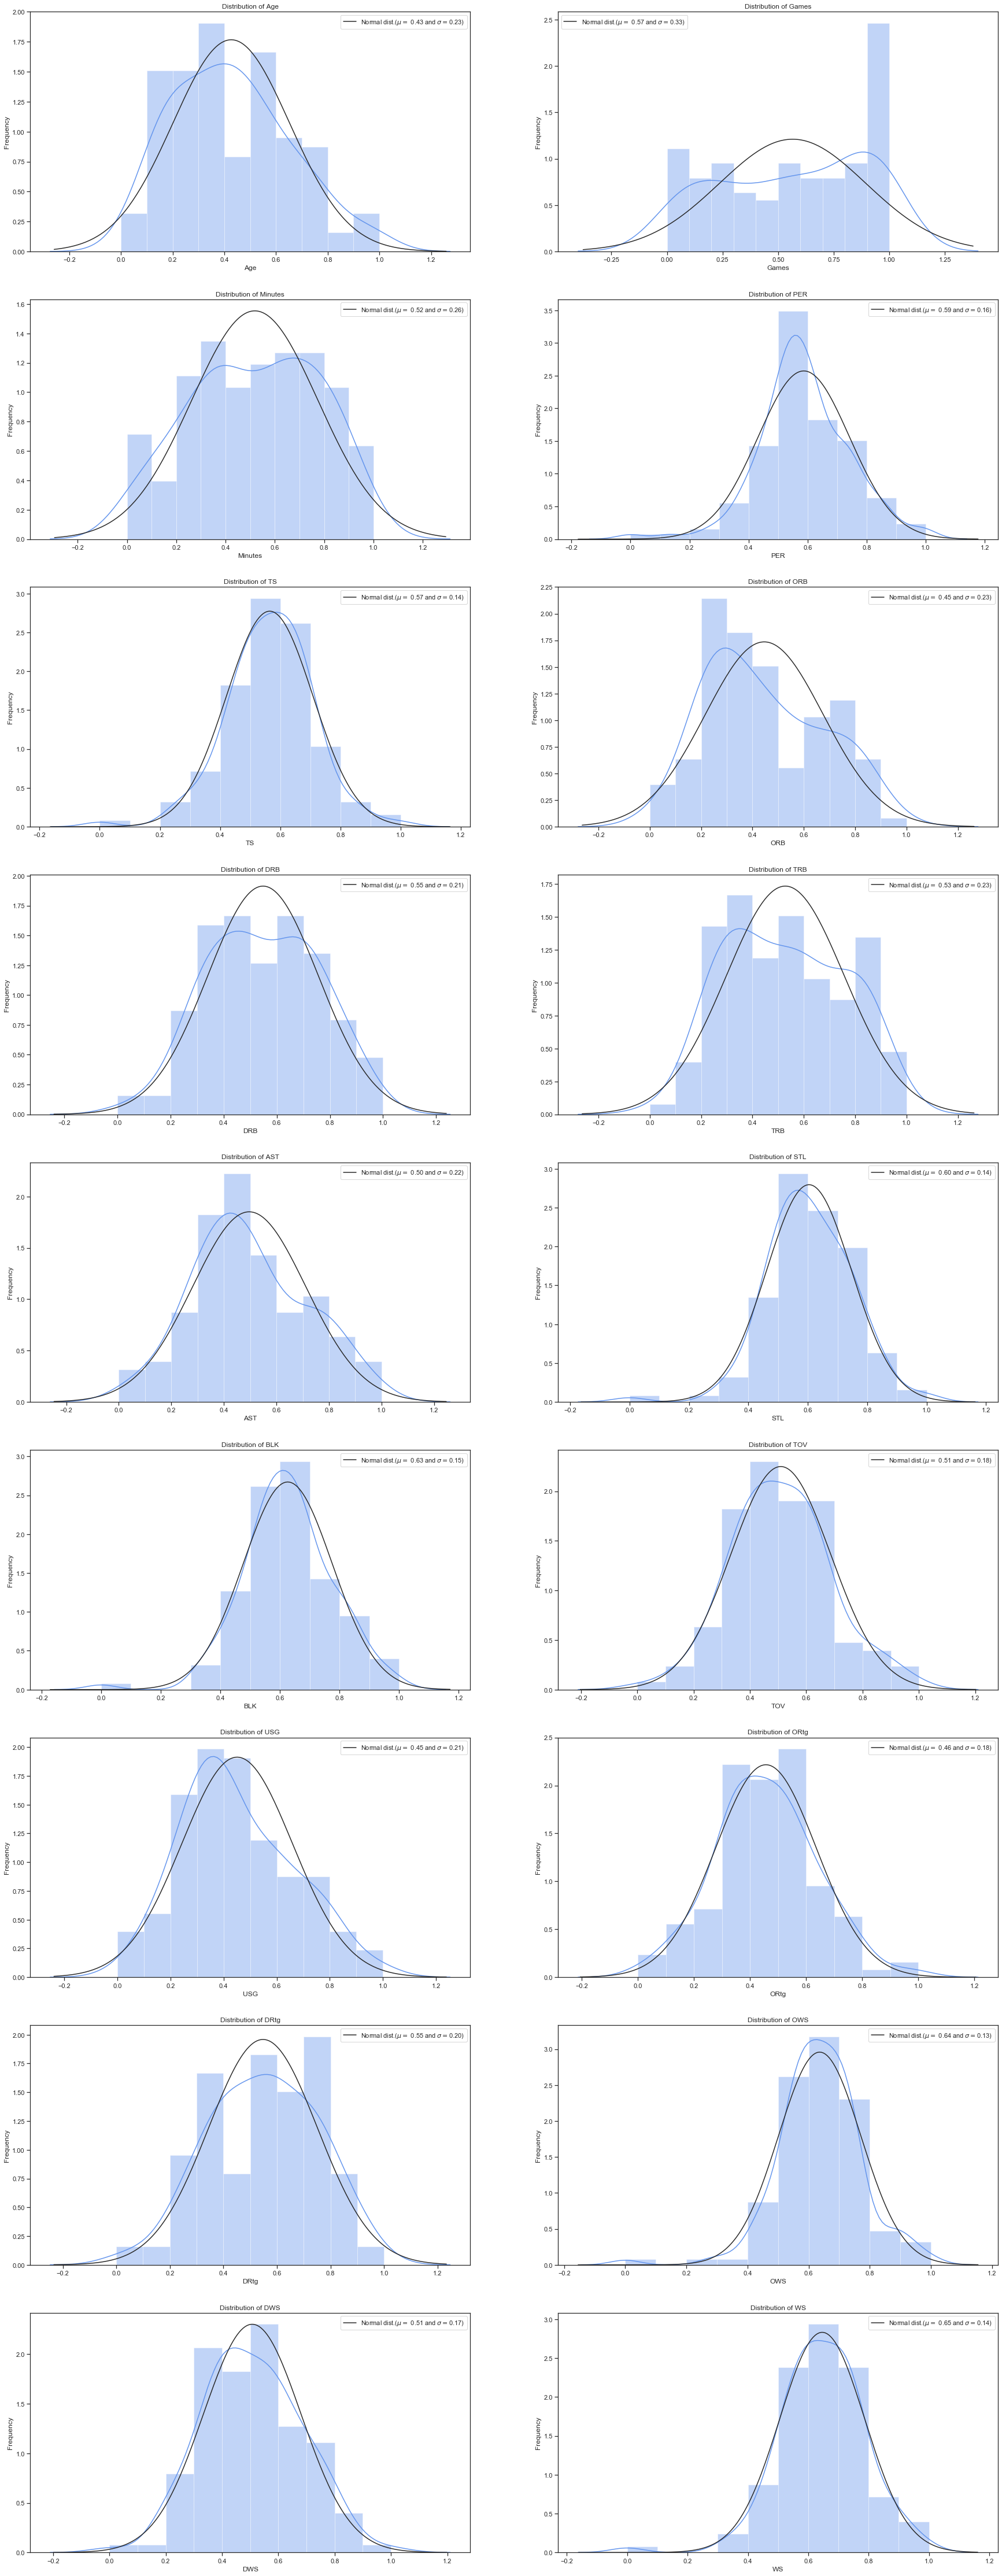

In [16]:
#%%
stats(normalized_data)    # after adjusting 
#%%
subplot_distribution(normalized_data)      # after adjusting

SALARY     1.000000
Minutes    0.658604
WS         0.613855
PER        0.577966
DWS        0.562947
USG        0.561797
OWS        0.539987
AST        0.365890
Games      0.258361
ORtg       0.233274
DRtg       0.191675
TOV        0.174963
TS         0.172234
STL        0.153477
DRB        0.095443
Age        0.090669
ORB        0.060893
BLK        0.039852
TRB        0.038554
Name: SALARY, dtype: float64


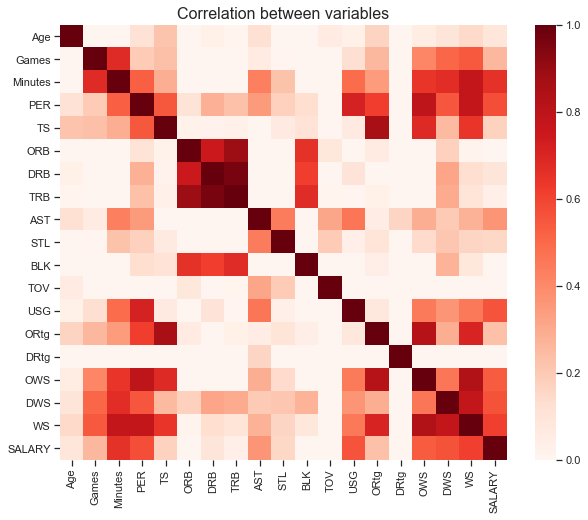

In [17]:
#%%
normalized_data = pd.concat([normalized_data,np.log(data["SALARY"])],axis=1)
plt.figure(figsize = (10,8))
sns.heatmap(normalized_data.corr(), vmin = 0, vmax = 1, cmap = 'Reds')
plt.title('Correlation between variables', fontsize = 16)

print(abs(normalized_data.corr()["SALARY"]).sort_values(ascending=False))

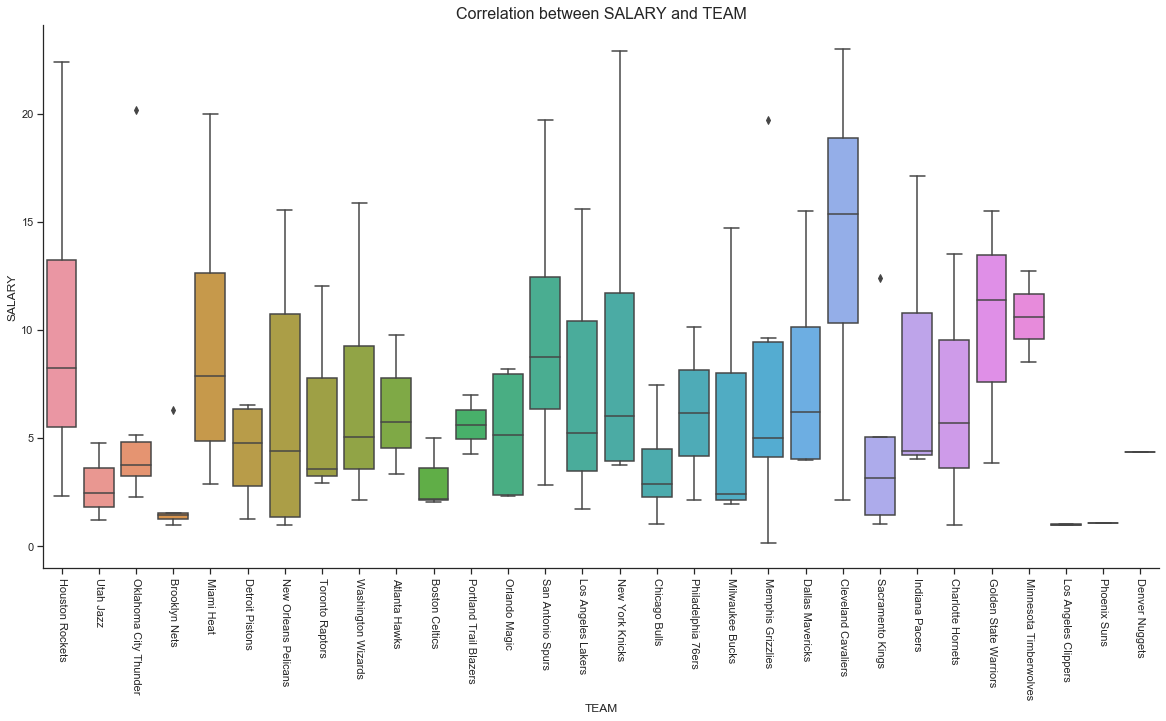

In [18]:
#%% 
# features---categorical variables
plt.figure(figsize=(20,10))
sns.set_palette("pastel")
sns.boxplot(x = 'TEAM', y = 'SALARY', data = data)
sns.despine()
plt.title('Correlation between SALARY and TEAM', fontsize = 16)
plt.xticks(rotation=270)
plt.show()      # team

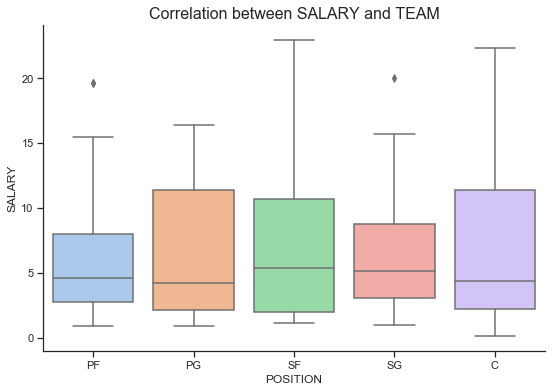

In [19]:
#%%
sns.set_palette("pastel")
sns.boxplot(x = 'POSITION', y = 'SALARY', data = data)
sns.despine()
plt.title('Correlation between SALARY and TEAM', fontsize = 16)
plt.show()     # position

In [20]:
#%%
# target 
stats(data["SALARY"])
#plot_distribution(data["SALARY"])


,0
mean,6.7842
std,5.6479
min,0.1114
max,22.9705
median,4.5000
skew,1.1874
kurt,0.5768


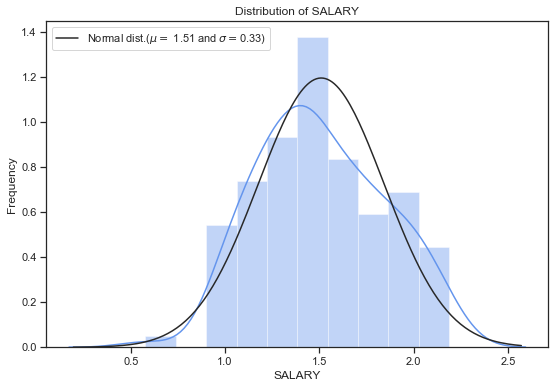

In [21]:
#%%
stats(data["SALARY"]**(1/4))   
plot_distribution(data["SALARY"]**(1/4))      # after adjusting

In [22]:
#%% feature engineering
def target_fe(data):
    return pd.DataFrame(data["SALARY"]**(1/4))

In [23]:
#%%
def numerical_fe(data):

    normalized_data = normalized(data[without_categorical_feature])
    
    for column in high_skewness:
        normalized_data[column] = normalized_data[column] ** (1/4)
    
    for column in medium_skewness:
        normalized_data[column] = np.sqrt(normalized_data[column])

    for column in low_skewness:
        normalized_data[column] =normalized_data[column] ** 2
    
    normalized_data.drop(columns=["TRB",
                            "WS"], axis=1, inplace=True)

    return normalized_data 


In [24]:
#%%
def categorical_fe(data, cols):
    c_fe = pd.DataFrame()
    for col in cols:
        dummies = pd.get_dummies(
            data[col], prefix_sep="_", drop_first=True, prefix=col)
        c_fe = pd.concat([c_fe, dummies], axis=1)

    return c_fe

In [25]:
#%%
def fe(df):
    return pd.concat(
        [target_fe(df), numerical_fe(df), categorical_fe(df, categorical_feature)], axis=1)

In [26]:
#%% Methodology and Modelling 1

# train and test set
train_set = fe(pd.read_csv("NBA_Train.csv"))

x_train = train_set.iloc[:,1:]
y_train=  train_set["SALARY"]

test_set = fe(pd.read_csv("NBA_Test.csv"))
test_set['TEAM_Houston Rockets'] = 0
test_set = test_set[train_set.columns]

x_test = test_set.iloc[:,1:]
y_test = test_set["SALARY"]


In [27]:
#%%  Modelling 1 ----Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

alpha = list(np.arange(0.0025, 0.003, 0.000001))
lasso = LassoCV(cv=5, random_state=0, alphas=alpha)

lasso.fit(x_train, y_train)

LassoCV(alphas=[0.0025, 0.002501, 0.0025020000000000003, 0.0025030000000000005,
                0.0025040000000000006, 0.0025050000000000007,
                0.002506000000000001, 0.002507000000000001,
                0.002508000000000001, 0.0025090000000000012,
                0.0025100000000000014, 0.0025110000000000015,
                0.0025120000000000016, 0.0025130000000000018,
                0.002514000000000002, 0.002515000000000002,
                0.0025160000000...
                0.002522000000000003, 0.002523000000000003,
                0.0025240000000000032, 0.0025250000000000034,
                0.0025260000000000035, 0.0025270000000000036,
                0.0025280000000000038, 0.002529000000000004, ...],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
        verbose=False)

In [28]:
#%%
lasso.alpha_
#lasso.coef_

0.0030000000000000664

In [29]:
#%%
prediction = lasso.predict(x_test)

np.sqrt(mean_squared_error(y_test ** 4, prediction**4))

4.17061173349729

In [30]:
#%%  Modelling 2 ----gradient boosting
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
tuning_parameters = {
    'learning_rate': [0.13,0.14,0.15],
    'n_estimators': np.arange(79,81,1),
    'max_depth': [2,3,4,],
}
gradient_boosting = RandomizedSearchCV(GradientBoostingRegressor(), tuning_parameters, n_iter=1, cv=5, return_train_score=False, n_jobs=4)

In [31]:
#%%
gradient_boosting.fit(x_train, y_train)

prediction = gradient_boosting.predict(x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
print('Best parameters found by randomised search:', gradient_boosting.best_params_, '\n')


Best parameters found by randomised search: {'n_estimators': 80, 'max_depth': 2, 'learning_rate': 0.13} 



In [33]:
# para = {    
#     'learning_rate': [0.01, 0.05, 0.1,0.11,0.12,0.13,0.14,0.15,0.16],
#     'n_estimators': np.arange(50,100,10),
#     'max_depth': [2,3,4,5, 6],
#        }
# report = []

# def rmse(y_pred1, y_test):
#     return np.sqrt(((y_pred1 - y_test) ** 2).mean())
# i = 0

# for n in para["n_estimators"]:
#     for md in para["max_depth"]:
#         for l in para["learning_rate"]: 
#             print(i)
#             print((n,md,l))
#             xgb_model = GradientBoostingRegressor(n_estimators=n ,max_depth=md,learning_rate=l)
#             xgb_model.fit(x_train,y_train)
#             y_pred1 = xgb_model.predict(x_test)

#             report.append(rmse(y_pred1 ** 4,y_test**4).round(4))
#             i += 1
            


In [34]:
# np.argsort(report)

In [35]:
# np.sort(report)

In [36]:
np.sqrt(mean_squared_error(y_test ** 4,prediction **4))

4.004198497586963

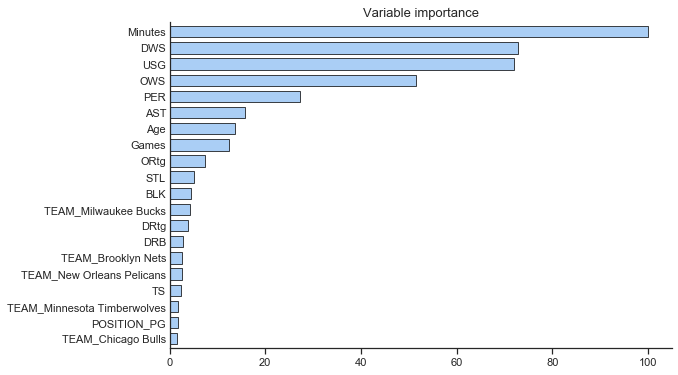

In [37]:
plot_feature_importance(gradient_boosting.best_estimator_, list(x_train))
plt.show()